# 07_기계학습_3 텍스트마이닝

# 텍스트 마이닝 기본 지식/기술 - 기본 필요 없고 3번부터 보면 됨

## 텍스트 정규화 - 텍스트 전처리 = 사전 준비작업
- 클렌징 : 불필요한 문자, 기호 제거 ex) HTML 태그 등
- 토큰화 : 쪼개는 거. 문서->문장->단어토큰
- 필터링/스톱 워드 제거/철자 수정
- Stemming
- Lemmatization

### 문장 토큰화
- 문장토큰화는 단어의 순서가 중요한 경우 사용

In [ ]:
# # ************ 될 지 모르겠지만 토큰화 nltk 에러나면 시도해보기
# import nltk
# nltk.download()

In [ ]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

In [ ]:
from nltk import sent_tokenize
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


### 단어 토큰화

In [ ]:
sentence = "The Matrix is everywhere its all around us, here even in this room."

from nltk import word_tokenize
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


#### 문장과 단어 토큰화 한 번에 하는 사용자 함수 만들기

In [ ]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

In [ ]:
#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


## 스톱 워드 제거
- 문맥적으로 큰 의미가 없는 단어 제거

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\50008313\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


## Stemming과 Lemmatization : 단어의 원형을 찾는 것
- Stemming : 단순화 해서 단어에서 일부 철자가 훼손되는 경향이 있음
<br>Porter
<br>Lancaster
<br>Snowball Stemmer


- Lemmatization : 더 정확한 철자로 된 어근 단어를 찾아줌. 대신 좀 오래 걸림
<br>WordNetLemmatizer

### Stemming

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'))

work


### Lemmatization
- 품사를 입력해줘야 함

In [ ]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


## 피처 벡터화/추출 : BOW - Bag of Words
- 단어를 컬럼으로 만들고, 문장을 행으로 봤을 때, 문장별로 각 단어가 몇 회(count)가 나타나는지 정리한 데이터
- 두 가지 방식 1) 카운트 기반 벡터화, 2) TF-IDF 벡터화
- TF-IDF를 사용. 개별 문서에서 자주 나타나는 단어에는 가중치를 주되, 모든 문서에서 나타나는 단어는 페널티 부과

### 사이킷런 CountVectorizer / TfidfVectorizer --> 결과는 사이파이 CSR 형식 희소행렬
- 두 개 사용법은 같음
- 벡터화 뿐만 아니라 소문자 변환, 토큰화, 스톱 워드 필터링 등의 전처리도 함께 수행
- fit, transform 사용
- 파라미터는 파머 완전 가이드 p.474 참고

### 참고. COO, CSR 형식 희소행렬
- 희소행렬: Sparse 행렬. 대부분 0으로 채워져 있음
  - <-> 밀집행렬(dense 행렬)
  - 불필요한 0으로 메모리 낭비가 심하고 크기가 커서 연산 시간이 오래 걸림
  - 희소행렬의 메모리 낭비가 적도록 변환하는 방법: COO, CSR
- COO: 0이 아닌 데이터만 별도의 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열에 저장하는 방식
  - 행과 열의 위치를 나타내기 위해서 반복적으로 같은 위치를 작성해야 함
- CSR: COO의 단점을 해결하기 위해 만들어졌으며 일반적으로 가장 많이 사용
  - 위치 배열의 값의 시작 위치만 표기하는 방법. (0행이 몇번째부터 시작하는지, 1열이 몇번째부터 시작하는지 위치만 작성)

[출처] https://bkshin.tistory.com/entry/NLP-7-희소-행렬-Sparse-Matrix-COO-형식-CSR-형식

In [ ]:
import numpy as np

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

from scipy import sparse
coo = sparse.coo_matrix(dense2) # coo 행렬 만들기
csr = sparse.csr_matrix(dense2) # csr 행렬 만들기
# 복원
print(coo.toarray())
print(csr.toarray())

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


- 이론적인 거

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())


COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


## 텍스트 마이닝 실습 (신문분석)

In [ ]:
!git clone https://github.com/GyeeunJeong/ADP.git

fatal: destination path 'ADP' already exists and is not an empty directory.


In [ ]:
from urllib.parse import quote_plus

import requests
import lxml.html
import codecs

article_all = []
import glob
import nltk
import re

articles_all = []
cat_list = glob.glob('ADP/data/bbc/*') # 영자신문 카테고리별로 신문 읽어오기

# 여러가지 주제의 뉴스기사 읽어오기
for folder in cat_list:
  print(folder)

  file_list = glob.glob(folder + '/*.txt') # 카테고리마다 저장된 txt파일 읽어오기
  for fn in file_list:
    fn_contents = open(fn, 'r')
    article = fn_contents.read()
    fn_contents.close()
    articles_all.append(article)

# 2글자 이상의 명사만 추출함
def get_noun(text):
  text = re.sub('[^A-Za-z ]+', '', text)
  texts = nltk.word_tokenize(text)
  return ([x for (x,y) in (nltk.pos_tag(texts)) if (y=='NNP' or y=='NN') and len(x)>1])  # pos_tag: 형태소 분석

ADP/data/bbc/entertainment
ADP/data/bbc/politics
ADP/data/bbc/business
ADP/data/bbc/tech
ADP/data/bbc/sport


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(tokenizer=get_noun, max_features=100)
tdm = cv.fit_transform(articles_all) #어떤 term이 어떤 document에 속하는지, tfidf score는 어떻게 되는지. (document, term) tfidf score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
print(tdm[0])

  (0, 55)	0.21266339570670753
  (0, 93)	0.21327519890026245
  (0, 8)	0.2002676504950796
  (0, 29)	0.20440127859718712
  (0, 59)	0.15927072281191854
  (0, 57)	0.40987516339531527
  (0, 53)	0.5829214174907217
  (0, 95)	0.15330032130791402
  (0, 91)	0.2666601114270372
  (0, 98)	0.14961282061925457
  (0, 99)	0.3593159203679832
  (0, 27)	0.21940426884605557


In [ ]:
import numpy
import operator
words = cv.get_feature_names() # 단어사전
count_mat = tdm.sum(axis=0)    # 단어마다 tfidf score
count = numpy.squeeze(numpy.asarray(count_mat))
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
hot_key = list(dict(word_count).keys())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
count

array([ 33.02954156,  54.55621512,  53.68204836,  54.4485829 ,
        36.48854665,  60.04629886,  86.76626884,  35.77560476,
        52.51627017,  40.69450076,  45.10282166,  49.96344971,
        30.00931697,  59.36713809,  88.94227049,  43.0387114 ,
        53.65009342,  54.10414361,  60.65492574,  58.05334671,
        57.84171827,  56.58243221,  65.37687603,  58.01675423,
        64.40312063,  60.36874288,  72.63546154,  45.16708978,
        49.66625042, 118.26126245,  79.6011348 ,  50.1666615 ,
       128.96157026, 103.73693857,  67.75730002,  66.79526497,
        78.447832  ,  42.81517423,  35.35575076,  54.58752913,
        51.5341859 ,  42.90753927,  35.87958212,  38.21499022,
        45.64002727,  36.87512307,  49.20237328,  43.56408622,
        44.91914381,  53.54896388,  45.85356619,  85.56520559,
        61.48377573,  63.74705811,  58.20600643,  43.11431216,
       123.99341074,  88.17971824,  65.89989446, 100.01055249,
        49.39016675,  45.06076465,  74.46257068,  60.41

In [ ]:
word_count[:10]

[('year', 167.45743992945893),
 ('game', 128.96157026148535),
 ('world', 125.0246652479693),
 ('time', 124.27460682339118),
 ('mr', 123.99341073794787),
 ('film', 118.26126244504222),
 ('government', 103.73693856850868),
 ('number', 100.0105524885636),
 ('company', 88.94227048792924),
 ('music', 88.17971823607581)]

In [ ]:
hot_key[:10]

['year',
 'game',
 'world',
 'time',
 'mr',
 'film',
 'government',
 'number',
 'company',
 'music']

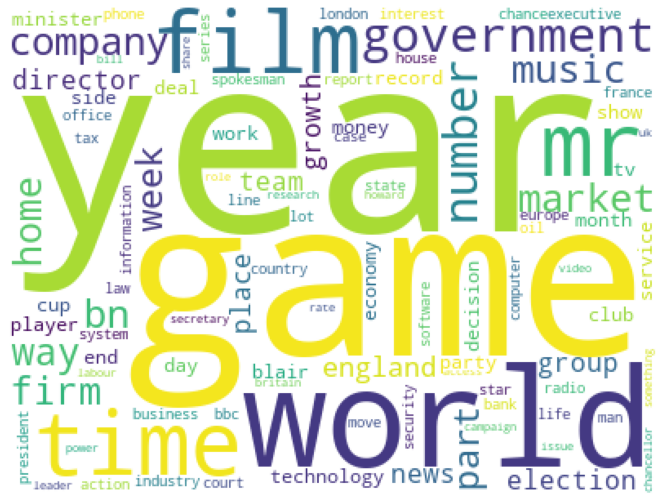

In [ ]:
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(background_color='white', width=400, height=300) #font_path='C:\\Windows\\Fonts\\NGULIM.ttf', 
cloud = wc.fit_words(dict(word_count)) # tfidf 크기가 크면 글자 크기가 커지게 클라우드 형성
pyplot.figure(figsize=(12,9))
pyplot.imshow(cloud)
pyplot.axis('off')
pyplot.show()

In [ ]:
count_iter = iter(count)
word_dict = dict(zip(words, count))

In [ ]:
import operator
sorted_tfidf = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
sorted_tfidf[:10]

[('year', 167.45743992945893),
 ('game', 128.96157026148535),
 ('world', 125.0246652479693),
 ('time', 124.27460682339118),
 ('mr', 123.99341073794787),
 ('film', 118.26126244504222),
 ('government', 103.73693856850868),
 ('number', 100.0105524885636),
 ('company', 88.94227048792924),
 ('music', 88.17971823607581)]

In [ ]:
import pandas as pd
tfidf_df = pd.DataFrame(list(sorted_tfidf), columns=('word', 'tfidf_score'))

In [ ]:
tfidf_df.head()

,word,tfidf_score
0,year,167.457440
1,game,128.961570
2,world,125.024665
3,time,124.274607
4,mr,123.993411


In [ ]:
tfidf_df.to_csv('sorted_tfidf.csv')

# 텍스트 분류 - 문서 분류
- 텍스트 피처 벡터화 희소 행렬을 잘 분류할 수 있는 알고리즘은 로지스틱 회귀, SVM, NB
- 순서 : 텍스트 정규화 -> 피처 벡터화 -> ML 학습/예측/평가

- 데이터 로딩

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


### 피처 벡터 변환(CounterVectorizer) --> Logsitc 분류

* CounterVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train , y_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


* ML 분류 예측

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.605


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 피처 벡터 변환(TF-IDF) --> Logsitc 분류

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


TF-IDF Logistic Regression 의 예측 정확도는 0.678


### 피처 벡터 변환(TF-IDF) + 스톱 워드, ngram 변경 --> Logsitc 분류

In [ ]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 ) 
                            #stop_words='english' 영어용 스탑 워드 사용.
                                                   # n-그램 범위: 띄어쓰기를 기본으로 토큰화를 진행하지만, 때로는 단어와 단어의 조합이 의미를 갖는 경우가 있다. 
                                                   # (e.g. go back). 최소 min개, 최대 max개의 단어 구성으로 토큰을 구성하게 할 수 있다.
                                                                      #max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
                                                                      #최대 몇개 문서에 걸쳐 포함된 단어까지 단어 꾸러미에 담아 사용할 것인지
                            # 매개변수 설명 출처: https://wikidocs.net/33664, https://mingchin.tistory.com/6?category=971417
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


## 위 작업을 GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.5min finished


Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.704


# 감성분석
- 지도학습은 레이블이 있음
- 비지도학습은 'Lexicon'이라는 감성 어휘 사전을 이용

- 데이터 로딩

In [ ]:
import pandas as pd

review_df = pd.read_csv('D:/github/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [ ]:
review_df['review'][0][:300]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe m'

## 지도학습 기반 감성 분석

### 클렌징 : 불필요 문자, 기호 삭제

In [ ]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )


### X, y 분리 : 감정(sentiment)가 y

In [ ]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

## Pipeline을 활용한 벡터화 후 ML 분류

#### 시도1. CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


예측 정확도는 0.8859, ROC-AUC는 0.9503


#### 시도2. TD-IDF

In [ ]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


예측 정확도는 0.8936, ROC-AUC는 0.9598


## 비지도학습 기반 감성분석

### 참고: Synset의 개념

import nltk
nltk.download('all')

- 참고 : NLP의 WordNet은 시멘틱 분석을 제공하는 어휘 사전

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


synsets() 반환 type : <class 'list'>
synsets() 반환 값 갯수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


- synset의 구성

In [ ]:
for synset in synsets[:5] :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']


- 단어 유사도 확인 방법<br>
path_similarity()

In [ ]:
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
# path_similarity: 1/두단어사이의distance (1일수록 유사)
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


### 참고: SentiWordNet : WordNet과 유사하게 Senti_Synset이 있음

- synset : 단어 + 품사 단위

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


- SentiSynset 객체는 단어의 감성을 나타내는 감성지수와 객관성을 나타내는 객관성 지수를 가지고 있음.
- 감성지수에는 긍정 감성 지수와 부정 감성 지수가 있음
- 0~1이고 1일수록 강한 것

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


### SentiWordNet을 이용한 감성 분석
**순서**
1. 문서(Document)를 문장(Sentence) 단위로 분해
2. 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅 단어 기반으로 synset 객체와 senti_synset 객체 생성
4. Senti_synset에서 긍/부정 지수를 구하고, 합산해 최종 긍/부정 결정

#### 품사 태깅 수행 함수 생성

In [ ]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

#### 문서 --> 문장 --> 단어토큰 --> 품사 태깅 --> SentiSynet 클래스 생성 --> Polarity Score 합산 함수 생성
- 결과가 0 이상일 경우 긍정, 그렇지 않을 경우 부정

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence)) # 토크나이즈 후 단어마다 품사 붙임
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0


#### 분석할 문서를 위 함수에 담아 돌리고, y_target과 preds를 추출

In [ ]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

- 이후에 정확도, 정밀도, 재현율, F1, AUC 확인하면 됨

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
print('#### SentiWordNet 예측 성능 평가 ####')
get_clf_eval(y_target, preds)

### VADER를 이용한 감성 분석
- 주로 소셜 미디어 분석에 이용

- compound score를 기준으로 보통 0.1 이상이면 긍정 감성, 이하면 부정 감성으로 판단한다
- 상황에 따라 약간 조정 가능

In [ ]:
# vader 설명 출처 https://kopio.tistory.com/8
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')
senti_analyzer = SentimentIntensityAnalyzer()                         # Vader 사전 가져오기
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0]) # 문장의 감정 표현하기
print(senti_scores)                                                   # 긍정, 중립, 부정, 복합 점수 dict로 출력

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [ ]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

In [ ]:
print('#### VADER 예측 성능 평가 ####')
get_clf_eval(y_target, vader_preds)

## 토픽 모델링 = 토픽 뽑아내기 (생성적 확률 모델)
- 단어 > 토픽 > 문서 > 말뭉치 (3층 위계적 베이지안 모델)
- 문서를 보고 토픽을 추론. 문서에 한 개 이상의 토픽이 포함될 수 있음
- LSA(Latent Semantic Analysis)와 LDA(latent Dirichlet Allocation) 기법이 있음
- 여기서는 LDA만 다룸
- LDA
  - 문서와 같은 데이터의 집합에 대한 Generative Probabilistic Model
  - 주어진 문서에 잠재된 토픽과 토픽에 해당되는 단어들을 뽑아내는 방법
  - 기능: 원하는 문서에서 원하는 토픽의 개수 k만큼 문서 분류 가능, 가중치 있는 토픽 단어 추출 가능
  1. Choose N ~ Poisson($ξ$): N은 문서의 길이. 포아송 분포에서 추출
  2. Choose $θ$ ~ Dir($α$) : 코푸스에서 공통적으로 쓰는 $α$(사용자가 지정)에서 Dirichlet 분포를 이용해서 주제분포 $θ$ 추출
    - $α$: 50/k 또는 임의의 값. 값이 작을수록 소수의 토픽을 강하게 나타내고 클수록 토픽을 두리뭉실하게 나타냄
  3. For each of the N words $w_n$:
    - (a) Choose a topic $z_n$ ~ Multinomial($θ$). : 주제분포 $θ$에서 주제 선정
      - $θ$: 해당 문서에서 각 주제의 가중치 (합하면 1)
    - (b) Choose a word $w_n$ from $p(w_n|z_n, \beta)$, a multinomial probablity conditioned on the topic $z_n$.
      - : 확률 베타를 이용해 z를 조건으로 단어 생성하고 생성된 단어를 모아 문서 생성

  - $z_k=∑^n_{i=1}β_{ik}*W_i$
    - $β_{ik}$: 관측단어($W_i$)가 특정 주제($z_k$)를 반영할 확률
    - $z_{ik}: i번째 문서에 해당하는 주제 k를 가리키는 원핫벡터
      - 주제의 개수는 k로 고정되어 있고(k는 정해줘야 함), $θ$, $z_{ik}$는 길이가 k인 벡터
    - $p(w_{ik}|z_{ik}, \beta_{ik})*p(z_{ik}|θ)$: 어떤 문서에서 어떤 토픽 k가 어떤 단어 w로 나타날 확률

- 사이킷런은 LDA 토픽 모델링을 LatentDirichletAllocation 클래스로 제공함
- LDA는 Count기반 벡터화만 사용함
- max_features=1000으로 word 피처 수 제한
- ngram_range=(1,2)

### 실습1

In [ ]:
!git clone https://github.com/joyfulspace/ADP.git

Cloning into 'ADP'...
remote: Enumerating objects: 2478, done.
remote: Counting objects: 100% (2171/2171), done.
remote: Compressing objects: 100% (2165/2165), done.
remote: Total 2478 (delta 18), reused 2136 (delta 4), pack-reused 307
Receiving objects: 100% (2478/2478), 55.93 MiB | 16.24 MiB/s, done.
Resolving deltas: 100% (140/140), done.
Checking out files: 100% (2397/2397), done.


In [ ]:
import pandas as pd
from urllib.parse import quote_plus
import nltk
import re
import glob

articles_all = []
cat_list = glob.glob('ADP/data/bbc/*') # 영자신문 카테고리별로 신문 읽어오기

# 여러가지 주제의 뉴스기사 읽어오기
for folder in cat_list:
  print(folder)

  file_list = glob.glob(folder + '/*.txt') # 카테고리마다 저장된 txt파일 읽어오기
  for fn in file_list:
    fn_contents = open(fn, 'r')
    article = fn_contents.read()
    fn_contents.close()
    articles_all.append(article)

ADP/data/bbc/entertainment
ADP/data/bbc/politics
ADP/data/bbc/business
ADP/data/bbc/tech
ADP/data/bbc/sport


In [ ]:
len(articles_all)

2224

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print('Topic %d:' % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1: -1]]))

# 2글자 이상의 명사만 추출
def get_noun(text):
  text = re.sub('[^A-Za-z ]+', '', text)
  texts = nltk.word_tokenize(text)
  return ([x for (x,y) in (nltk.pos_tag(texts)) if (y=='NNP' or y=='NN') and len(x)>1])  # pos_tag: 형태소 분석

documents = articles_all

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

no_features = 1000 # 피처 개수
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS  # 어느 문서에나 있는 중요하지 않은 단어. a, abount 등

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(tokenizer=get_noun, max_df=0.95, min_df=2, max_features=no_features, stop_words=my_stop_words)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(tfidf_feature_names)

1000

In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
# LDA에서는 CountVectorizer 써야함 (NMF에서는 tfidf 사용)
tf_vectorizer = CountVectorizer(tokenizer=get_noun, min_df=2, max_df=0.95, max_features=no_features, stop_words=my_stop_words)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(tf_feature_names)

1000

In [ ]:
LatentDirichletAllocation??

In [ ]:
no_topics = 5 # 주제 개수 관련 알고리즘은 아직 없음

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components =no_topics, random_state=0, max_iter=5, learning_method='online', learning_offset=50).fit(tf)

no_top_words = 30
print('NMF', '----------------------------')  # 주제 5개에 대해 상위 30개 단어 나옴
display_topics(nmf, tfidf_feature_names, no_top_words)
print('LDA', '----------------------------')
display_topics(lda, tf_feature_names, no_top_words)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


NMF ----------------------------
Topic 0:
blair election mr party government labour minister tax howard chancellor leader brown campaign secretary britain kennedy tory cabinet country lord immigration issue budget spokesman home council war education law lib
Topic 1:
game cup england world team match injury time season club coach ireland france victory win rugby player chelsea manager champion football title scotland yearold goal squad chance robinson ball year
Topic 2:
film award actor director actress oscar movie comedy festival aviator star role hollywood office drama story ceremony box cinema prize tv category life book academy dollar baby year number career
Topic 3:
growth bn economy year bank market oil company firm quarter rate government dollar demand rise stock business deal spending investment december trade month president consumer price profit debt group china
Topic 4:
music technology phone software tv service video broadband computer information access security industry n

### 실습2
- 데이터 가져오기
- 주제를 8개만 가져옴

In [ ]:
from sklearn.datasets import fetch_20newsgroups
# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

- Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape) # 7862개의 문서가 1000개의 피처로 구성된 벡터화된 데이터셋

CountVectorizer Shape: (7862, 1000)


- LDA 수행

In [ ]:
# LDA 수행 : n_components는 주제의 개수
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect) # input은 count 벡터화 한 것

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
print(lda.components_.shape)
lda.components_ # 8개 토픽 별로 1000개의 word피처(위에서 Count벡터화 한 피처)별 연관도 값


(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)


Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


# 문서 군집화 : 비슷한 텍스트 구성의 문서를 군집화하는 것
- 텍스트 분류 기반의 문서 분류는 train data에 카테고리가 정해져 있는 지도학습인 반면, 문서 군집화는 비지도학습

## 여러개의 파일(문서)을 하나의 Dataframe으로 만들기
- filename과 txt로 구성된 df로 만들기

In [ ]:
# 이건 참고용
# filename과 txt 두 개 컬럼으로 구성된 dataframe을 만들면 됨

import pandas as pd
import glob ,os

# 파일들이 있는 경로 
path = r'C:\Users\chkwon\Text\OpinosisDataset1.0\OpinosisDataset1.0\topics'                     
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

## TF-IDF 벡터화
- tokenizer = LemNormalize()
- ngram_range=(1,2)
- min_df, max_df로 피처 개수 설정

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


## 군집화 시행(KMeans)

In [ ]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

- 결과 합치기

In [ ]:
document_df['cluster_label'] = cluster_label
document_df.head()

- cluster_label별로 어떤 filename이 있는지 보고 주제를 파악

In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')
document_df[document_df['cluster_label']==1].sort_values(by='filename')
document_df[document_df['cluster_label']==2].sort_values(by='filename')

- 너무 세분화 되어있는 것 같으면 KMeans n_clusters를 3정도로 줄여서 다시 시행

## 군집별 핵심 단어 추출

In [ ]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details


In [ ]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')


In [ ]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

**해석** 
- cluster별 핵심 단어와 관련 파일 명이 나옴

## 문서 유사도 - 코사인 유사도

### 문서 TF-IDF 벡터화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


### 사이킷런의 cosine_similarity()로 유사도 측정
- input : 첫 번째는 비교의 기준(A), 두 번째는 비교 대상(B) = A를 B와 비교했을 때의 유사도 측정
- outpu : 첫 번째는 자신과의 비교, 두 번째부터는 B에 있는 각 문서와의 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)
print("첫 번째는 자신과의 비교니까 1이고, 두 번째 문서와는 0.40, 세 번째 문서와도 0.40의 유사도를 가짐")

[[1.         0.40207758 0.40425045]]
첫 번째는 자신과의 비교니까 1이고, 두 번째 문서와는 0.40, 세 번째 문서와도 0.40의 유사도를 가짐


In [ ]:
# 다수의 문서 : 다수의 문서를 넣으면 A의 각 문서에 대한 B의 각 문서와의 유사도가 모두 계산 됨
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print("다수의 문서 : 다수의 문서를 넣으면 A의 각 문서에 대한 B의 각 문서와의 유사도가 모두 계산 됨")
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

다수의 문서 : 다수의 문서를 넣으면 A의 각 문서에 대한 B의 각 문서와의 유사도가 모두 계산 됨
[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## 예시 : 문서 군집화 및 문사 유사도 측정

- 데이터 로딩

In [ ]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\chkwon\Text\OpinosisDataset1.0\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

- 필요한 사용자함수 만들기

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

- TF-IDF , 군집화

In [ ]:
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)


- 시각화

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

# 한글 텍스트 마이닝

- 데이터 로딩

In [ ]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')
test_df = pd.read_csv('ratings_test.txt', sep='\t')
train_df.head(3)

- y값 비율 확인

In [ ]:
train_df['label'].value_counts( )

- 클렌징

In [ ]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

In [ ]:
# 참고 : 특수문자 제거
text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)

- 형태소 단위로 토큰화 w/ Twitter

In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

- TF-IDF 벡터화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

- GridSearch CV로 분류

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))


- Test

In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))